## Preliminaries

In [1]:
#!conda install -y -c rdkit -c mordred-descriptor mordred

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import __init__ as a
a.mpl.rcParams['font.size'] = 12

/home/rgerkin/Dropbox (ASU)/science/enantiomerlist


### This is important

In [4]:
if a.HAS_OBABEL:
    a.test_eden_pybel() # Should show two molecules below.  

In [9]:
a.OP_HOME

'/home/rgerkin/Dropbox (ASU)/science/enantiomerlist/olfaction-prediction'

In [5]:
a.test_rdkit_mordred() # Should show features for two molecules below.  

Convering SMILES string to Mol format...
Computing 3D coordinates...
Computing Mordred features...


100%|██████████| 2/2 [00:00<00:00,  4.66it/s]


There are 2 molecules and 1824 features


,SpAbs_D,SpMax_D,SpDiam_D,SpAD_D,SpMAD_D,LogEE_D,SM1_D,VE1_D,VE2_D,VE3_D,...,VSA_EState4,VSA_EState5,VSA_EState6,VSA_EState7,VSA_EState8,VSA_EState9,WPath,WPol,TopoPSA(NO),TopoPSA
OC[C@@H](O1)[C@@H](O)[C@H](O)[C@@H]2[C@@H]1c3c(O)c(OC)c(O)cc3C(=O)O2,185.211,92.6056,129.86,185.211,8.05266,92.6056,6.36701e-14,4.72343,0.205366,2.38544,...,0,0,0,0,0,69.6667,1030,47,145.91,145.91
CC(=O)NCCC1=CNc2c1cc(OC)cc2,137.523,68.7616,102.998,137.523,8.0896,68.7616,1.88208e-13,4.05242,0.238378,1.92994,...,0,0,0,0,0,38.8333,561,22,54.12,54.12


In [6]:
plus_carvone = 'CC1=CC[C@@H](CC1=O)C(=C)C'
minus_carvone = 'CC1=CC[C@H](CC1=O)C(=C)C'
features = a.smiles_to_mordred([plus_carvone,minus_carvone])
plus_features = features.values[0,:]
minus_features = features.values[1,:]
print("%.1f percent of Mordred features are identical between (+)-carvone and (-)-carvone." % \
      (100.0*(plus_features==minus_features).mean()))

Convering SMILES string to Mol format...
Computing 3D coordinates...
Computing Mordred features...


100%|██████████| 2/2 [00:00<00:00, 10.88it/s]


There are 2 molecules and 1824 features
79.0 percent of Mordred features are identical between (+)-carvone and (-)-carvone.


## Load data from the DREAM challenge

In [7]:
dream_CIDs = a.loading.get_CIDs(['training','leaderboard','testset']) # Load the DREAM CIDs
dream_CID_dilutions = a.loading.get_CID_dilutions(['training','leaderboard','testset'])

Determining CIDs and dilutions the long way one time.Results will be stored for faster retrieval in the future
Loading training data
Pickling training data
Loading leaderboard data
Pickling leaderboard data
Loading testset data
Pickling testset data
Loading training-norep data
Pickling training-norep data
Loading replicated data
Pickling replicated data


In [11]:
dream_smiles = a.get_dream_smiles(dream_CIDs) # Load the DREAM SMILES strings

In [12]:
isomeric_CIDs = a.find_isomers(dream_CIDs,dream_smiles)

In [13]:
if a.HAS_OBABEL:
    a.show_isomers(isomeric_CIDs,dream_CIDs,dream_smiles) # Show the isomeric pairs from the DREAM challenge

In [14]:
# Load DREAM perceptual data
dream_perceptual_data = a.loading.load_perceptual_data(['training','leaderboard','testset'])
Y_dream = a.dream.make_Y(dream_perceptual_data)
# We must also have an imputed version that we can use as input to the algorithm since it will not work with NaNs.  
Y_dream_imputed = a.dream.make_Y(dream_perceptual_data, imputer='median')

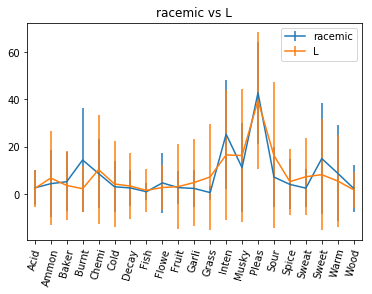

In [15]:
isomeric_index = 0 # The first isomeric pair, which should be racemic vs L-something
a.plot_isomer_ratings(dream_perceptual_data,isomeric_CIDs[isomeric_index],('racemic','L'))

In [16]:
shadmany_smiles = a.load_other_smiles(shadmany=True)
shadmany_data = a.load_data('shadmany')

Loading molecules from the Shadmany enantiomer collection...
Loaded 32 molecules


In [17]:
shadmany_data

,Molecule Name,Pubchem ID #,Detection Threshold,Detection Units,Normalized Detection Threshold,Molecule Odour
C=C(C)[C@@H]1CC=C(C)C(=O)C1,(4S)-(+)-carvone,16724,1.30E+02,ppb,1.300000e+02,"caraway, fresh herbal"
C=C(C)[C@H]1CC=C(C)C(=O)C1,(4R)-(-)-carvone,439570,2.00E+00,ppb,2.000000e+00,"sweet spearmint, fresh herbal"
C=C(C)[C@@H]1CCC2=CC(=O)C[C@@H](C)[C@]2(C)C1,"(4R,4aS,6R)-(+) nootkatone",1268142,1.50E+01,ppm,1.500000e+04,grapefruit odor
C=C(C)[C@H]1CCC2=CC(=O)C[C@H](C)[C@@]2(C)C1,"(4S,4aR,6S)-(-) nootkatone",7567181,6.60E+04,ppm,6.600000e+07,woody and spicy
C=C1CCCC(C)(C)[C@@H]1/C=C/C(C)=O,(S)-(+)-gamma-ionone,11194862,7.00E-02,ppb water,7.000000e-02,"Linear, very pleasant, floral, green, woody od..."
C=C1CCCC(C)(C)[C@H]1/C=C/C(C)=O,(R)-(-)-gamma-ionone,11389922,1.10E+01,ppb water,1.100000e+01,"Weak green, fruity, pineapple-like odor with m..."
C=C[C@@H](O)CCCCC,(S)-(+)-1-octen-3-ol,2724898,1.00E+02,ppb in aqueous ethanol,1.000000e+02,"moldy, grassy, artificial; also desribed as he..."
C=C[C@H](O)CCCCC,(R)-(-)-1-octen-3-ol,6992244,1.00E+01,ppb in aqueous ethanol,1.000000e+01,"fruity, genuine mushroom-like; also desribed a..."
C=C[C@@]1(C)CC[C@H]([C@@H](C)C=O)O1,"(2R,2\'R,5\'R)-Lilac aldehyde",71587756,2.20E+01,ng,2.200000e-02,flowery
C=C[C@]1(C)CC[C@@H]([C@H](C)C=O)O1,"(2S,2\'S,5\'S)-Lilac aldehyde",441572,2.00E-01,ng,2.000000e-04,"fresh, flowery"


## Compute DREAM molecule features and place into a data frame

In [18]:
# Compute Morgan features for DREAM molecules
all_smiles = list(set(dream_smiles + shadmany_smiles))
morgan_sim_all = a.smiles_to_morgan_sim(all_smiles,all_smiles)

507 similarity features for 507 molecules


In [19]:
# Compute NSPDK features for DREAM molecules
if a.HAS_OBABEL:
    nspdk_all = a.smiles_to_nspdk(all_smiles)
else:
    nspdk_all = []

In [20]:
# Compute Dragon or Mordred features for DREAM molecules
if a.USE_DRAGON:
    dragon_all = a.smiles_to_dragon(all_smiles)
else:
    dragon_all = a.smiles_to_mordred(all_smiles)

Convering SMILES string to Mol format...
Computing 3D coordinates...
Computing Mordred features...


100%|██████████| 507/507 [00:17<00:00, 29.34it/s]


There are 507 molecules and 1824 features


In [21]:
# Combine all DREAM molecular features into one dataframe
molecular_data_all = dragon_all.join(nspdk_all).join(morgan_sim_all).astype('float')

In [22]:
molecular_data_dream = molecular_data_all.loc[dream_smiles]
# Reindex by the CIDs instead of the SMILES strings
assert list(molecular_data_dream.index)==dream_smiles
molecular_data_dream.index = dream_CIDs

In [23]:
# Compute the final DREAM molecular features matrix.  
X_dream,good1,good2,means,stds,imputer = a.dream.make_X(molecular_data_dream,dream_CID_dilutions)

The X matrix now has shape (952x1697) molecules by non-NaN good molecular descriptors


In [24]:
dummy_intensity = -3.0
shadmany_CIDs = [shadmany_data.loc[smile]['Pubchem ID #'] for smile in shadmany_smiles]
shadmany_CID_dilutions = [(shadmany_data.loc[smile]['Pubchem ID #'],dummy_intensity) for smile in shadmany_smiles]
molecular_data_shadmany = molecular_data_all.loc[shadmany_smiles]
assert list(molecular_data_shadmany.index) == shadmany_smiles
molecular_data_shadmany.index = shadmany_CIDs
X_shadmany = a.dream.make_X(molecular_data_shadmany,shadmany_CID_dilutions,
                            good1=good1,good2=good2,means=means,stds=stds)[0]
# Reorder molecules to match the order in the spreadsheet
X_shadmany = X_shadmany.loc[[(cid,dummy_intensity) for cid in shadmany_data['Pubchem ID #']]]
# Confirm that the order matches
assert list(X_shadmany.index.get_level_values('CID')) == list(shadmany_data['Pubchem ID #'])

The X matrix now has shape (32x1697) molecules by non-NaN good molecular descriptors


## Fit model to DREAM data

In [25]:
# Model for DREAM data
rfs = {}
n_estimators = 25
these_descriptors = a.descriptors[:1] # Just intensity
Y_dream_mean = Y_dream.stack('Descriptor').mean(axis=1).unstack('Descriptor')
for i,descriptor in enumerate(these_descriptors):
    print("%d. Fitting model for %s..." % (i+1,descriptor))
    rfs[descriptor] = a.RandomForestRegressor(n_estimators=n_estimators)
    valid = Y_dream_mean[descriptor].notnull()
    rfs[descriptor].fit(X_dream.loc[valid].as_matrix(),Y_dream_mean[descriptor].loc[valid].as_matrix())

1. Fitting model for Intensity...


In [26]:
# Check model quality by cross-validation on the DREAM data.  
from sklearn.model_selection import GroupShuffleSplit
x = X_dream.loc[valid]
y = Y_dream_mean[descriptor].loc[valid]
groups = x.index.get_level_values('CID')
ss = GroupShuffleSplit(n_splits=3)
for train,test in ss.split(x,groups=groups):
    rfs['Intensity'] = a.RandomForestRegressor(n_estimators=25,random_state=0)
    rfs['Intensity'].fit(x.iloc[train].as_matrix(),y.iloc[train].as_matrix())
    predicted = rfs['Intensity'].predict(x.iloc[test].as_matrix())
    observed = y.iloc[test]
    print(a.np.corrcoef(predicted,observed)[0,1])

0.693696324394
0.663224096853
0.651281217356


## Compute predictions and display

t=-10.354, p=6.46e-23


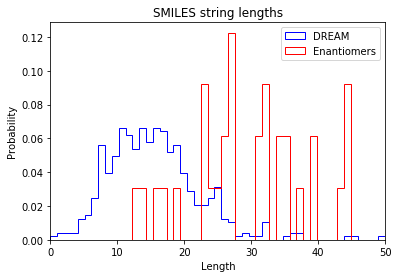

In [27]:
a.compare_smiles_lengths(dream_smiles,shadmany_smiles,['DREAM','Enantiomers']);

t=-3.964, p=8.42e-05


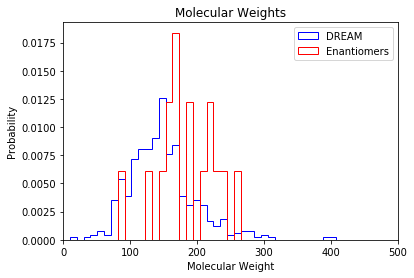

In [28]:
a.compare_molecular_weights(molecular_data_dream,molecular_data_shadmany,['DREAM','Enantiomers']);

In [29]:
predictions = a.make_predictions(rfs,X_shadmany,['Intensity'])

In [30]:
plus_pred = predictions.iloc[0::2]['Intensity'].values
minus_pred = predictions.iloc[1::2]['Intensity'].values

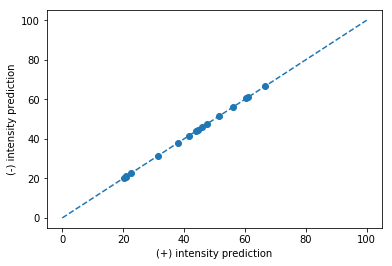

In [31]:
a.plt.scatter(plus_pred,minus_pred)
a.plt.plot([0,100],[0,100],'--')
a.plt.xlabel('(+) intensity prediction')
a.plt.ylabel('(-) intensity prediction')
a.plt.show()

In [32]:
plus_thresh = shadmany_data.iloc[0::2]['Normalized Detection Threshold'].values
minus_thresh = shadmany_data.iloc[1::2]['Normalized Detection Threshold'].values
plus_thresh = a.np.clip(plus_thresh,1e-8,1e8)
minus_thresh = a.np.clip(minus_thresh,1e-8,1e8)

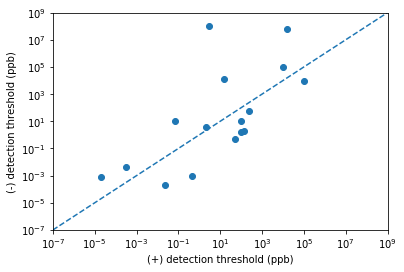

In [33]:
a.plt.scatter(plus_thresh,minus_thresh)
a.plt.plot([1e-7,1e9],[1e-7,1e9],'--')
a.plt.xlim(1e-7,1e9)
a.plt.ylim(1e-7,1e9)
a.plt.xscale('log')
a.plt.yscale('log')
a.plt.xlabel('(+) detection threshold (ppb)')
a.plt.ylabel('(-) detection threshold (ppb)')
a.plt.show()

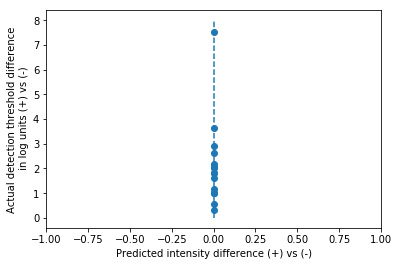

In [34]:
delta_pred = plus_pred - minus_pred
delta_thresh = a.np.log10(minus_thresh / plus_thresh)
inds = delta_thresh.argsort()
delta_pred = delta_pred[inds]
delta_thresh = delta_thresh[inds]
negative = delta_thresh < 0
delta_thresh[negative] *= -1
delta_pred[negative] *= -1
a.plt.scatter(delta_pred,delta_thresh)
a.plt.xlabel('Predicted intensity difference (+) vs (-)')
a.plt.ylabel('Actual detection threshold difference\n in log units (+) vs (-)')
a.plt.plot([0,0],[0,8],'--')
a.plt.xlim(-1,1)
a.plt.show()

In [35]:
print("Correlation coefficient R = %.3f" % a.np.corrcoef(delta_pred,delta_thresh)[0,1])

Correlation coefficient R = nan


/home/rgerkin/miniconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3167: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/rgerkin/miniconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3168: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


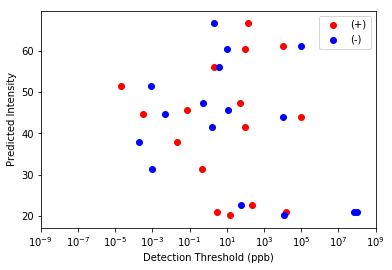

Correlation between predicted intensity and actual detection thresholds is R=-0.359


In [36]:
a.plt.scatter(plus_thresh,plus_pred,color='r',label='(+)')
a.plt.scatter(minus_thresh,minus_pred,color='b',label='(-)')
a.plt.xscale('log')
a.plt.xlim(1e-9,1e9)
a.plt.xlabel('Detection Threshold (ppb)')
a.plt.ylabel('Predicted Intensity')
a.plt.legend()
a.plt.show()
print("Correlation between predicted intensity and actual detection thresholds is R=%.3f" % \
      a.np.corrcoef(a.np.concatenate((plus_thresh,minus_thresh)),a.np.concatenate((plus_pred,minus_pred)))[0,1])